# Linear Regression

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/hmatalonga/data-science-bits/blob/master/notebooks/linear_regression.ipynb)

Linear Regression algorithm implementation from scratch.

**Acknowledgements:** This code was originally inspired by [MLfromscratch](https://github.com/python-engineer/MLfromscratch) repository.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

sns.set_theme()

In [2]:
# Set seed for reproducibility
SEED = 42
np.random.seed(42)

In [3]:
class LinearRegression:

  def __init__(self, learning_rate=0.001, n_iters=1000):
    self.learning_rate = learning_rate
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    n_samples, n_features = X.shape

    # init parameters
    self.weights = np.zeros(shape=n_features)
    self.bias = 0

    # gradient descent
    for _ in range(self.n_iters):
      y_pred = np.dot(X, self.weights) + self.bias
      
      # compute gradients
      dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
      db = (1 / n_samples) * np.sum(y_pred - y)

      # update parameters
      self.weights -= self.learning_rate * dw
      self.bias -= self.learning_rate * db

    return self

  def predict(self, X):
    return np.dot(X, self.weights) + self.bias

In [4]:
X, y = make_regression(n_samples=500, n_features=1, noise=15, random_state=SEED)

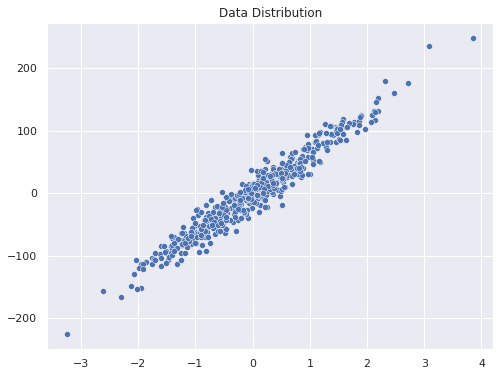

In [5]:
fig = plt.figure(figsize=(8,6))
ax = sns.scatterplot(x=X.flatten(), y=y)
_ = ax.set(title='Data Distribution')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [7]:
linear_reg = LinearRegression(learning_rate=0.01, n_iters=1000).fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mse

208.42440254070772

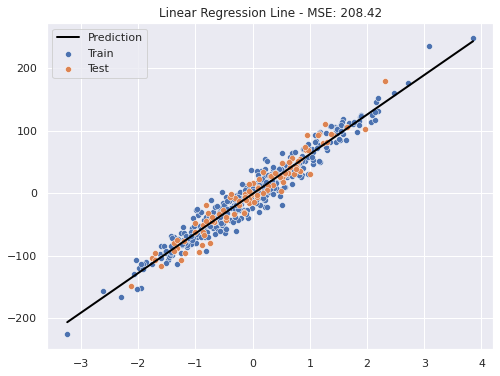

In [8]:
y_pred_line = linear_reg.predict(X)

fig = plt.figure(figsize=(8,6))
s1 = sns.scatterplot(x=X_train.flatten(), y=y_train, label='Train')
s2 = sns.scatterplot(x=X_test.flatten(), y=y_test, label='Test')
ax = sns.lineplot(x=X.flatten(), y=y_pred_line, color='black', linewidth=2,
                 label='Prediction')
_ = ax.set(title=f'Linear Regression Line - MSE: {mse:.2f}')